In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train = x_train/255
x_test = x_test/255

In [17]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

AttributeError: 'numpy.uint8' object has no attribute 'items'

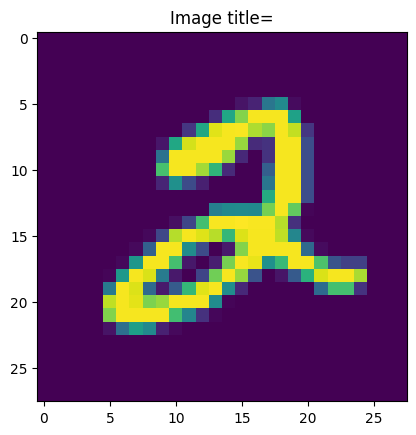

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title('Image title=',y_train[5])
plt.show()

In [7]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [8]:
import numpy as np
np.unique(y_train) #the length of output params there will be

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
model = Sequential([
    Flatten(input_shape=(28,28)), #input layer (since the image is 28x28 we are taking 28 inputs each row column, so total neuron = 784)
    Dense(5, activation='relu'), #hidden layer with 5 neurons
    Dense(10, activation='softmax'),#output layer with 10 neuron since we need 10 outputs
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)


Epoch 1/5
1875/1875 - 3s - 1ms/step - accuracy: 0.7447 - loss: 0.8760
Epoch 2/5
1875/1875 - 2s - 1ms/step - accuracy: 0.8548 - loss: 0.5269
Epoch 3/5
1875/1875 - 2s - 1ms/step - accuracy: 0.8692 - loss: 0.4736
Epoch 4/5
1875/1875 - 2s - 1ms/step - accuracy: 0.8774 - loss: 0.4410
Epoch 5/5
1875/1875 - 2s - 1ms/step - accuracy: 0.8836 - loss: 0.4178


In [18]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8675 - loss: 0.4696  


[0.4170985817909241, 0.8842999935150146]

In [19]:
model.get_weights()

[array([[ 0.0225286 ,  0.04123408,  0.07683517, -0.02686514,  0.07594307],
        [-0.08490796,  0.01278816,  0.07960746,  0.04467352, -0.05087681],
        [ 0.08264387,  0.04306017, -0.03749525,  0.01600724,  0.05084583],
        ...,
        [-0.08346451,  0.08309482, -0.02811157,  0.0555059 , -0.01255585],
        [ 0.03099178, -0.044088  , -0.01274841, -0.07473781, -0.05269017],
        [ 0.05022687,  0.08511277,  0.00360756, -0.00701269, -0.01821106]],
       dtype=float32),
 array([ 0.03994927,  0.6889116 ,  0.5314107 ,  0.02810408, -0.24083133],
       dtype=float32),
 array([[-0.5547734 ,  0.8457376 ,  0.36724296,  0.59322464, -1.3550091 ,
         -0.30282128, -0.34141266, -0.06050939, -0.22088969, -1.0569243 ],
        [-0.05879711, -1.0493604 , -0.22780049,  0.35625598,  1.0739075 ,
          0.35002488,  0.1961582 , -0.5107349 , -0.88979703, -0.583433  ],
        [ 0.33908287, -0.8655215 ,  0.3590817 ,  0.04459496, -0.16876012,
         -0.8367246 , -0.32694894,  1.285006